## Test of time operation for SRB temporary dataset 

In [1]:
# data loading
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats, integrate

%matplotlib inline
sns.set(color_codes=True)

df = pd.read_hdf('SRB.h5', 'Rat_Behavior').set_index('index')
df7 = pd.read_hdf('SRB7.h5', 'Rat_Behavior').set_index('index')
print(len(df))

15148


In [2]:
df.head()

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,dT,...,lz2,clockwise,theta,U,UM,MotiveExpTimeSecs,visible,speed,subU,subUM
index,,,,,,,,,,,,,,,,,,,,,
0,17040,71.000005,0.072614,0.095443,-0.038461,0.943414,-0.267464,-0.195232,2,0.004167,...,-0.203123,-1,0.000485,-6.662978,-6.376508,59.129167,1,-7.0,-0.337022,-0.623492
1,17041,71.004171,0.072631,0.095450,-0.038446,0.943570,-0.267228,-0.194803,2,0.004166,...,-0.202648,-1,0.000469,-6.446231,-6.361802,59.129167,1,-7.0,-0.553769,-0.638198
2,17042,71.008338,0.072648,0.095457,-0.038431,0.943722,-0.267010,-0.194368,2,0.004167,...,-0.202189,-1,0.000474,-6.523562,-6.319288,59.129167,1,-7.0,-0.476438,-0.680712
3,17043,71.012505,0.072666,0.095464,-0.038417,0.943887,-0.266747,-0.193931,2,0.004167,...,-0.201725,-1,0.000479,-6.586125,-6.263810,59.129167,1,-7.0,-0.413875,-0.736190
4,17044,71.016671,0.072677,0.095470,-0.038406,0.944003,-0.266652,-0.193512,2,0.004166,...,-0.201255,-1,0.000449,-6.177022,-6.187017,59.129167,1,-7.0,-0.822978,-0.812983


In [3]:
df7.head()

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,dT,...,lz2,clockwise,theta,U,UM,MotiveExpTimeSecs,visible,speed,subU,subUM
index,,,,,,,,,,,,,,,,,,,,,
0,17328,72.200005,0.002214,0.099829,0.068062,-0.034924,-0.057514,0.997480,7,0.004167,...,0.999416,-1,0.000832,-11.437400,-11.391357,58.804167,1,-28.0,-16.562600,-16.608643
1,17329,72.204171,0.002166,0.099827,0.068060,-0.035761,-0.057798,0.997434,7,0.004166,...,0.999388,-1,0.000839,-11.540101,-11.417556,58.804167,1,-28.0,-16.459899,-16.582444
2,17330,72.208338,0.002119,0.099825,0.068061,-0.036647,-0.058029,0.997388,7,0.004167,...,0.999358,-1,0.000889,-12.230178,-11.438255,58.804167,1,-28.0,-15.769822,-16.561745
3,17331,72.212505,0.002071,0.099822,0.068059,-0.037493,-0.058311,0.997341,7,0.004167,...,0.999326,-1,0.000848,-11.664497,-11.456868,58.804167,1,-28.0,-16.335503,-16.543132
4,17332,72.216671,0.002024,0.099819,0.068056,-0.038313,-0.058639,0.997291,7,0.004166,...,0.999294,-1,0.000823,-11.316994,-11.478388,58.804167,1,-28.0,-16.683006,-16.521612


In [4]:
# df7['limmin'], df7['limmax'] = 0, 0

# #7/-7
# df7['changemin'] = (df7['limmin']==0) & (df7['speed']==-7)
# df7['changemax'] = (df7['limmax']==0) & (df7['speed']==-7)
# df7['limmin'] = np.where(df7['changemin']==True, -10, df7['limmin'])
# df7['limmax'] = np.where(df7['changemax']==True, -3 , df7['limmax'])

# df7['changemin'] = (df7['limmin']==0) & (df7['speed']==7)
# df7['changemax'] = (df7['limmax']==0) & (df7['speed']==7)
# df7['limmin'] = np.where(df7['changemin']==True, 3 , df7['limmin'])
# df7['limmax'] = np.where(df7['changemax']==True, 10, df7['limmax'])

# print(df7.limmax.min())
# print(df7.limmax.max())


In [5]:
# def conditions(val, speed, lim, y):
#     if (val == speed & lim==0):
#         return y
#     else:
#         return 0

# func = np.vectorize(conditions)
# energy_class = func(df7['speed'], 7, ['limmax'], -10)

In [6]:
# df7['limmin'], df7['limmax'] = 0, 0

# #7/-7
# df7['changemin'] = (df7['limmin']==0) & (df7['speed']==-7)
# df7['changemax'] = (df7['limmax']==0) & (df7['speed']==-7)
# df7['limmin'] = np.where(df7['changemin']==True, -10, df7['limmin'])
# df7['limmax'] = np.where(df7['changemax']==True, -3 , df7['limmax'])
# df7['changemin'] = (df7['limmin']==0) & (df7['speed']==7)
# df7['changemax'] = (df7['limmax']==0) & (df7['speed']==7)
# df7['limmin'] = np.where(df7['changemin']==True, 3 , df7['limmin'])
# df7['limmax'] = np.where(df7['changemax']==True, 10, df7['limmax'])

# #14/-14
# df7['changemin'] = (df7['limmin']==0) & (df7['speed']==-14)
# df7['changemax'] = (df7['limmax']==0) & (df7['speed']==-14)
# df7['limmin'] = np.where(df7['changemin']==True, -16, df7['limmin'])
# df7['limmax'] = np.where(df7['changemin']==True, -6 , df7['limmax'])
# df7['changemin'] = (df7['limmin']==0) & (df7['speed']== 14)
# df7['changemax'] = (df7['limmax']==0) & (df7['speed']== 14)
# df7['limmin'] = np.where(df7['changemin']==True,  6 , df7['limmin'])
# df7['limmax'] = np.where(df7['changemin']==True,  16, df7['limmax'])

# #28/-28
# df7['changemin'] = (df7['limmin']==0) & (df7['speed']==-28)
# df7['changemax'] = (df7['limmax']==0) & (df7['speed']==-28)
# df7['limmin'] = np.where(df7['changemin']==True, -34, df7['limmin'])
# df7['limmax'] = np.where(df7['changemin']==True, -20, df7['limmax'])
# df7['changemin'] = (df7['limmin']==0) & (df7['speed']== 28)
# df7['changemax'] = (df7['limmax']==0) & (df7['speed']== 28)
# df7['limmin'] = np.where(df7['changemin']==True,  20, df7['limmin'])
# df7['limmax'] = np.where(df7['changemin']==True,  34, df7['limmax'])

# print(df7.limmax.min())
# print(df7.limmax.max())

In [7]:
limits=pd.DataFrame({'speed':[7, -7, 14, -14, 28, -28],
                     'min'  :[-10, 3, -16, 6, -34, 20],
                     'max'  :[-3, 10, -6, 16, -20, 34]})
limits

,max,min,speed
0,-3,-10,7
1,10,3,-7
2,-6,-16,14
3,16,6,-14
4,-20,-34,28
5,34,20,-28


In [8]:
df7['limmin'], df7['limmax'] = 0, 0
for index, row in limits.iterrows():
    df7['changemin'] = (df7['limmin']==0) & (df7['speed']==-row['speed'])
    df7['changemax'] = (df7['limmax']==0) & (df7['speed']==-row['speed'])
    df7['limmin'] = np.where(df7['changemin']==True, row['min'], df7['limmin'])
    df7['limmax'] = np.where(df7['changemax']==True, row['max'], df7['limmax'])

In [9]:
df7['SRB'] = (df7['U'] > df7['limmin']) & (df7['U'] < df7['limmax'])
print(len(df7))
print(len(df7[df7['SRB']==True]))

526
238


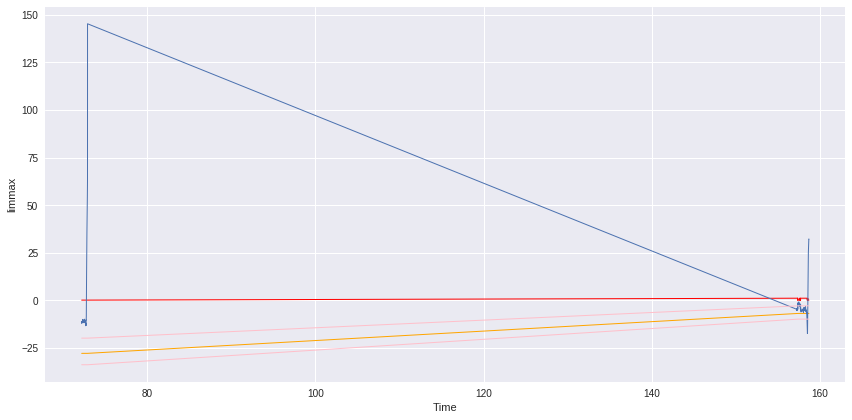

In [10]:
# a, b = 156, 159
# g = sns.FacetGrid(data=df7, size=6, aspect=2, xlim=[a,b], ylim=[-20, 20])
g = sns.FacetGrid(data=df7, size=6, aspect=2)
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1, color='orange');
g.map(plt.plot, "Time", "SRB" , alpha=1, linewidth=1, color='red');
g.map(plt.plot, "Time", "U"     , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "limmin", alpha=1, linewidth=1, color='pink');
g.map(plt.plot, "Time", "limmax", alpha=1, linewidth=1, color='pink');


## Apply method for all of the selected SRB moments

In [11]:
## SRB calculations
df['limmin'], df['limmax'] = 0, 0
for index, row in limits.iterrows():
    df['changemin'] = (df['limmin']==0) & (df['speed']==-row['speed'])
    df['changemax'] = (df['limmax']==0) & (df['speed']==-row['speed'])
    df['limmin'] = np.where(df['changemin']==True, row['min'], df['limmin'])
    df['limmax'] = np.where(df['changemax']==True, row['max'], df['limmax'])

df['SRB'] = (df['U'] > df['limmin']) & (df['U'] < df['limmax'])

In [12]:
df.head()

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,dT,...,MotiveExpTimeSecs,visible,speed,subU,subUM,limmin,limmax,changemin,changemax,SRB
index,,,,,,,,,,,,,,,,,,,,,
0,17040,71.000005,0.072614,0.095443,-0.038461,0.943414,-0.267464,-0.195232,2,0.004167,...,59.129167,1,-7.0,-0.337022,-0.623492,-10,-3,False,False,True
1,17041,71.004171,0.072631,0.095450,-0.038446,0.943570,-0.267228,-0.194803,2,0.004166,...,59.129167,1,-7.0,-0.553769,-0.638198,-10,-3,False,False,True
2,17042,71.008338,0.072648,0.095457,-0.038431,0.943722,-0.267010,-0.194368,2,0.004167,...,59.129167,1,-7.0,-0.476438,-0.680712,-10,-3,False,False,True
3,17043,71.012505,0.072666,0.095464,-0.038417,0.943887,-0.266747,-0.193931,2,0.004167,...,59.129167,1,-7.0,-0.413875,-0.736190,-10,-3,False,False,True
4,17044,71.016671,0.072677,0.095470,-0.038406,0.944003,-0.266652,-0.193512,2,0.004166,...,59.129167,1,-7.0,-0.822978,-0.812983,-10,-3,False,False,True


In [13]:
# DF = pd.DataFrame()
# for name, dd in df.groupby('session_id'):   
#     # calculating dtime - time difference between srb    
#     dfSRBtemp = dd[dd['SRB']==True]
#     dfSRBtemp['dtime'] = dfSRBtemp['Time'].diff(1)
#     df2 = pd.merge(dd, dfSRBtemp[['dtime', 'Frame', 'session_id','Time']], on=['Frame', 'session_id','Time'], how='outer')
#     df2.fillna(0, inplace=True)
    
#     #special time cases
#     dftemp = dfSRBtemp[(dfSRBtemp['dtime']>0.005) & (dfSRBtemp['dtime']<0.1)]
#     dftemp = dftemp.reset_index(drop=True)

#     maxF, minF = {}, {}
#     df2['SRBall'] = df2['SRB']     
#     df2['SRBtt'] = False
#     # merge super close events
#     for i in np.arange(0,len(dftemp)):
#         maxF[i] = dftemp.Time[i]
#         minF[i] = df2[(df2['dtime']>0) & (df2['Time']<maxF[i])].Time
#         minF[i] = minF[i].iloc[-1]
#         print(minF[i], maxF[i])
    
#         df2['SRBtt'] = (df2['Time']>minF[i]) & (df2['Time']<maxF[i])
#         df2['SRBall'] = (df2['SRBtt']==True) | (df2['SRBall']==True)
#     DF = pd.concat([DF, df2], axis=0, ignore_index=True)    

In [16]:
# remove super short 'fake' events
DF = pd.DataFrame()
# df1= df[df['session_id']==2]
for name, dd in df.groupby('session_id'):   
    # calculating dtime - time difference between srb    
    dfSRBtemp = dd[dd['SRB']==False]
    dfSRBtemp['dtime'] = dfSRBtemp['Time'].diff(1)
    df2 = pd.merge(dd, dfSRBtemp[['dtime', 'Frame', 'session_id','Time']], on=['Frame', 'session_id','Time'], how='outer')
    df2.fillna(0, inplace=True)
    
    #special time cases
    dftemp = dfSRBtemp[(dfSRBtemp['dtime']<0.01)]
    dftemp = dftemp.reset_index(drop=True)

    df2['SRBtt'] = False
    df2['SRBall'] = df2['SRB']     
    maxF2, minF2 = {}, {}
    
    for i in np.arange(0,len(dftemp)-1):
        minF2[i] = dftemp.Time[i]
        maxF2[i] = df2[(df2['dtime']==0) & (df2['Time']>minF2[i])].Time.reset_index(drop=True)        
        maxF2[i] = maxF2[i].iloc[0]
#         print(dftemp.dtime[i], dftemp.Time[i], minF2[i], maxF2[i])
        
        df2['SRBtt'] = (df2['Time']>minF2[i]) & (df2['Time']<maxF2[i])
        df2['SRBall'] = (df2['SRBtt']==True) | (df2['SRBall']==True)
    DF = pd.concat([DF, df2], axis=0, ignore_index=True)    

# DF[(DF['session_id']==7) & (DF['SRBtt']==True)].SRBtt 

/home/ateska/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


IndexError: single positional indexer is out-of-bounds

In [ ]:
g = sns.FacetGrid(data=DF, size=6, aspect=2)
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1, color='orange');
g.map(plt.plot, "Time", "SRB" , alpha=1, linewidth=1, color='red');
g.map(plt.plot, "Time", "SRBall" , alpha=1, linewidth=1, color='blue');
g.map(plt.plot, "Time", "SRBtt" , alpha=1, linewidth=1, color='yellow');
g.map(plt.plot, "Time", "U"     , alpha=1, linewidth=1);


In [ ]:
# # remove super short 'fake' events
# DF = pd.DataFrame()
# for name, dd in df.groupby('session_id'):   
#     # calculating dtime - time difference between srb    
#     dfSRBtemp = dd[dd['SRB']==True]
#     dfSRBtemp['dtime'] = dfSRBtemp['Time'].diff(1)
#     df2 = pd.merge(dd, dfSRBtemp[['dtime', 'Frame', 'session_id','Time']], on=['Frame', 'session_id','Time'], how='outer')
#     df2.fillna(0, inplace=True)
    
#     #special time cases
# #     dftemp = dfSRBtemp[(dfSRBtemp['dtime']>0.005)]
#     dftemp = dfSRBtemp
#     dftemp = dftemp.reset_index(drop=True)

#     df2['SRBtt'] = False
#     df2['SRBall'] = df2['SRB']     
#     maxF2, minF2 = {}, {}
#     for i in np.arange(0,len(dftemp)-1):
#         minF2[i] = dftemp.Time[i]
#         maxF2[i] = df2[(df2['dtime']==0) & (df2['Time']>minF2[i])].Time.reset_index(drop=True)        
#         maxF2[i] = maxF2[i].iloc[0]
#         if (maxF2[i] - minF2[i])< 0.015:
# #             print((maxF2[i] - minF2[i]))
#             df2['SRBtt'] = (df2['Time']>minF2[i]) & (df2['Time']<maxF2[i])
#         df2['SRBall'] = (df2['SRBtt']==True) & (df2['SRBall']==False)
#     DF = pd.concat([DF, df2], axis=0, ignore_index=True)    

# # DF[(DF['session_id']==7) & (DF['SRBtt']==True)].SRBtt 

In [ ]:
a, b = 305, 310
temp = DF[DF['session_id']==6]
# g = sns.FacetGrid(data=temp, size=6, aspect=2, xlim=[a,b])
# # g = sns.FacetGrid(data=temp, size=6, aspect=2)
# g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1, color='orange');
# g.map(plt.plot, "Time", "SRB" , alpha=1, linewidth=1, color='red');
# g.map(plt.plot, "Time", "SRBall" , alpha=1, linewidth=1, color='blue');
# g.map(plt.plot, "Time", "U"     , alpha=1, linewidth=1);
# g.map(plt.plot, "Time", "limmin", alpha=1, linewidth=1, color='pink');
# g.map(plt.plot, "Time", "limmax", alpha=1, linewidth=1, color='pink');

g = sns.FacetGrid(data=temp, size=6, aspect=2, xlim=[a,b], ylim=[-20,20])
# g = sns.FacetGrid(data=temp, size=6, aspect=2)
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1, color='orange');
g.map(plt.plot, "Time", "SRB" , alpha=1, linewidth=1, color='red');
g.map(plt.plot, "Time", "SRBall" , alpha=1, linewidth=1, color='blue');
# g.map(plt.plot, "Time", "SRBtt" , alpha=1, linewidth=1, color='yellow');
g.map(plt.plot, "Time", "U"     , alpha=1, linewidth=1);
# g.map(plt.plot, "Time", "limmin", alpha=1, linewidth=1, color='pink');
# g.map(plt.plot, "Time", "limmax", alpha=1, linewidth=1, color='pink');


In [ ]:
a, b = 284.75, 290
temp = DF[DF['session_id']==6]
# g = sns.FacetGrid(data=temp, size=6, aspect=2, xlim=[a,b], ylim=[-20, 20])
g = sns.FacetGrid(data=temp, size=6, aspect=2)
# g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1, color='orange');
g.map(plt.plot, "Time", "SRB" , alpha=1, linewidth=1, color='red');
g.map(plt.plot, "Time", "dtime" , alpha=1, linewidth=1, color='black');
g.map(plt.plot, "Time", "SRBall" , alpha=1, linewidth=1, color='blue');
# g.map(plt.plot, "Time", "U"     , alpha=1, linewidth=1);
# g.map(plt.plot, "Time", "limmin", alpha=1, linewidth=1, color='pink');
# g.map(plt.plot, "Time", "limmax", alpha=1, linewidth=1, color='pink');


## Removing small SRB moments

In [ ]:
df6 = DF[DF['session_id']==6]
temp =df6[(df6['Time']>284.75)&( df6['Time']<285.5)] 
g = sns.FacetGrid(data=temp, size=6, aspect=2)
g.map(plt.plot, "Time", "SRBall" , alpha=1, linewidth=1, color='red');
g.map(plt.plot, "Time", "SRB" , alpha=1, linewidth=1, color='blue');
g.map(plt.plot, "Time", "dtime" , alpha=1, linewidth=1, color='yellow');

temp[temp['dtime']>0]   